## Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, accuracy_score,f1_score, precision_score
from sklearn.neighbors import KNeighborsClassifier


## Read in cleaned data

In [2]:
df_subreddits = pd.read_csv('/Users/annarutledge/Documents/general_assembly/submissions22/projects/project-3-master/data/subreddits.csv')

In [3]:
df_subreddits.head()

,title,text,auth,time,subreddit,full_text,letter_count,word_count,subreddit_code
0,"Every woman who is not lesbian is gay, (girls ...",NaN,Altruistic_Rest_9861,1643317371,showerthoughts,"Every woman who is not lesbian is gay, (girls ...",131,26,0
1,Everyone keeps their phone on silent because w...,NaN,smcmahon710,1643317311,showerthoughts,Everyone keeps their phone on silent because w...,81,13,0
2,A good book will always be new.,NaN,agreatday248,1643317210,showerthoughts,A good book will always be new.,31,7,0
3,"Science can either prove that no deity exists,...",NaN,shimkei,1643317183,showerthoughts,"Science can either prove that no deity exists,...",132,26,0
4,The fact that I have to actively remind myself...,NaN,DawnMayRise,1643317126,showerthoughts,The fact that I have to actively remind myself...,118,22,0


## Train - Test - Split

In [4]:
X = df_subreddits[['full_text', 'letter_count', 'word_count']]

y = df_subreddits['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

In [6]:
X_train.shape

(14548, 3)

In [7]:
X_test.shape

(4850, 3)

In [8]:
y_train.shape

(14548,)

In [9]:
y_test.shape

(4850,)

## KNN model

In [10]:
cv = CountVectorizer()

In [11]:
text_vectorizer = make_column_transformer((cv, 'full_text'), remainder='passthrough', n_jobs=-1, verbose_feature_names_out=False)

In [12]:
knn = KNeighborsClassifier()

In [13]:
pipe = make_pipeline(text_vectorizer, knn)

In [14]:
params = {
    'kneighborsclassifier__n_neighbors':[4, 5, 6], 
    'kneighborsclassifier__weights':['uniform', 'distance'],
    'columntransformer__countvectorizer__ngram_range':[(1,2), (1,3)], 
    'columntransformer__countvectorizer__max_df':[0.8, 0.9, 1],
    'columntransformer__countvectorizer__min_df':[0, 0.1, 0.2],
    'columntransformer__countvectorizer__stop_words':[None, 'english']
}

In [15]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [16]:
gs.fit(X_train, y_train)

/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annarutledge/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='passthrough',
                                                          transformers=[('countvectorizer',
                                                                         CountVectorizer(),
                                                                         'full_text')],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'columntransformer__countvectorizer__max_df': [0.8,
                                                                        0.9,
                                                                        1],
                         'columntrans

In [19]:
gs.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('countvectorizer',
                                                  CountVectorizer(max_df=0.8,
                                                                  min_df=0,
                                                                  ngram_range=(1,
                                                                               2)),
                                                  'full_text')],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=6, weights='distance'))])

In [20]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__countvectorizer__max_df,param_columntransformer__countvectorizer__min_df,param_columntransformer__countvectorizer__ngram_range,param_columntransformer__countvectorizer__stop_words,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.841240,0.075790,4.014956,0.078446,0.8,0,"(1, 2)",None,4,uniform,{'columntransformer__countvectorizer__max_df':...,0.666323,0.659107,0.674227,0.656927,0.671021,0.665521,0.006659,29
1,1.650475,0.291076,3.895203,0.096690,0.8,0,"(1, 2)",None,4,distance,{'columntransformer__countvectorizer__max_df':...,0.688316,0.680756,0.692440,0.678584,0.701272,0.688274,0.008206,7
2,1.571317,0.100204,3.948523,0.196636,0.8,0,"(1, 2)",None,5,uniform,{'columntransformer__countvectorizer__max_df':...,0.689347,0.676289,0.700687,0.689240,0.693709,0.689854,0.007961,5
3,1.590082,0.154187,3.890649,0.102057,0.8,0,"(1, 2)",None,5,distance,{'columntransformer__countvectorizer__max_df':...,0.692784,0.678007,0.703436,0.690959,0.696116,0.692260,0.008305,3
4,1.462602,0.107256,3.911137,0.113015,0.8,0,"(1, 2)",None,6,uniform,{'columntransformer__countvectorizer__max_df':...,0.681100,0.669759,0.683505,0.676177,0.685115,0.679131,0.005574,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1.455587,0.048883,0.000000,0.000000,1,0.2,"(1, 3)",english,4,distance,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162
212,1.301214,0.057797,0.000000,0.000000,1,0.2,"(1, 3)",english,5,uniform,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161
213,1.227055,0.056524,0.000000,0.000000,1,0.2,"(1, 3)",english,5,distance,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160
214,1.324017,0.053298,0.000000,0.000000,1,0.2,"(1, 3)",english,6,uniform,{'columntransformer__countvectorizer__max_df':...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191


In [21]:
y_preds = gs.predict(X_test)

In [22]:
y_preds

array(['showerthoughts', 'crazyideas', 'crazyideas', ...,
       'showerthoughts', 'crazyideas', 'crazyideas'], dtype=object)

### Accuracy score

In [23]:
gs.score(X_test, y_test)

0.7010309278350515

In [24]:
accuracy_score(y_test, y_preds)

0.7010309278350515

### Recall/sensitivity score

In [25]:
recall_score(y_test, y_preds, pos_label='crazyideas')

0.7653721682847896

### Precision score

In [26]:
precision_score(y_test, y_preds, pos_label='crazyideas')

0.6850108616944244

### F1 Score

In [27]:
f1_score(y_test, y_preds, pos_label='crazyideas')

0.722965227359572

### Confusion Matrix

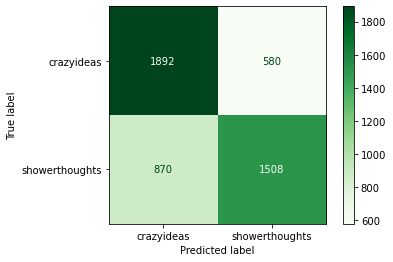

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, cmap='Greens');